In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import classification_report


from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

2022-11-05 19:09:12.184602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
train_dir = '/Users/macbookpro/Desktop/DATASET/TRAIN'
test_dir = '/Users/macbookpro/Desktop/DATASET/TEST'

In [4]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)


test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [5]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')


validation_generator  = test_datagen.flow_from_directory(directory =test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


# Creating the model 

In [23]:
model = tf.keras.models.Sequential([
    # Three hidden layers using 'swish' activation function
    tf.keras.layers.Conv2D(32, (3,3), activation='swish',padding = 'Same', input_shape=(224, 224, 3)),
    # Max pooling to reduce the dimentions 
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='swish',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='swish',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten layer to create one dimention array  
    tf.keras.layers.Flatten(),
    # Fully connected layer 
    tf.keras.layers.Dense(50, activation='swish'),
    tf.keras.layers.Dropout(0.5),
    # Output layer using 'softmax' activation function 
    tf.keras.layers.Dense(5, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

# Compile the model 

In [25]:
# Using 'adam' optimizer and 25 epochs
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

epochs = 25  
batch_size = 16

In [26]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Fit the model 

In [27]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/25
 9/55 [===>..........................] - ETA: 38s - loss: 1.8785 - accuracy: 0.2153

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 54s 965ms/step - loss: 1.6555 - accuracy: 0.2552 - val_loss: 1.2472 - val_accuracy: 0.5652
Epoch 2/25
55/55 [==============================] - 58s 1s/step - loss: 1.4573 - accuracy: 0.3684 - val_loss: 0.9744 - val_accuracy: 0.5978
Epoch 3/25
55/55 [==============================] - 55s 994ms/step - loss: 1.4000 - accuracy: 0.4203 - val_loss: 0.8329 - val_accuracy: 0.6413
Epoch 4/25
55/55 [==============================] - 63s 1s/step - loss: 1.3572 - accuracy: 0.4573 - val_loss: 0.8457 - val_accuracy: 0.6304
Epoch 5/25
55/55 [==============================] - 72s 1s/step - loss: 1.2393 - accuracy: 0.4954 - val_loss: 0.9092 - val_accuracy: 0.7283
Epoch 6/25
55/55 [==============================] - 89s 2s/step - loss: 1.2046 - accuracy: 0.5277 - val_loss: 0.8888 - val_accuracy: 0.6739
Epoch 7/25
55/55 [==============================] - 99s 2s/step - loss: 1.1544 - accuracy: 0.5497 - val_loss: 0.7042 - val_accuracy: 0.6630
Epoch 8/25
55/55 [=======

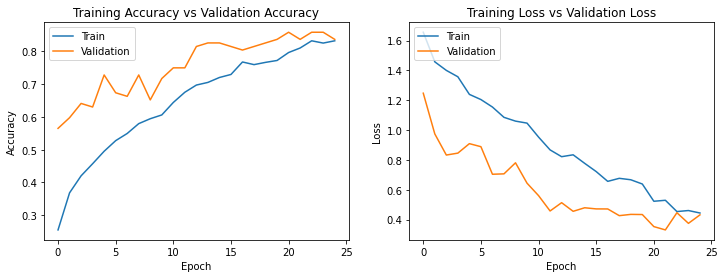

In [28]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [29]:
y_val_org = []
for i in range( validation_generator.__len__() ):
    y_val_org.extend(
        validation_generator.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [30]:
y_val_org

array([4, 2, 0, 2, 4, 0, 4, 1, 3, 0, 0, 2, 0, 4, 4, 0, 2, 0, 1, 2, 3, 2,
       0, 1, 4, 2, 4, 2, 3, 4, 2, 1, 4, 4, 4, 2, 2, 3, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 2, 3, 1, 4, 3, 4, 3, 1, 3, 3, 1, 4, 3, 0, 1, 2, 2, 3, 0,
       4, 4, 4, 1, 2, 2, 4, 1, 1, 3, 2, 2, 2, 4, 1, 0, 1, 1, 3, 0, 2, 4,
       2, 0, 4, 2])

# Prediction of validation 

In [31]:
predication = model.predict(validation_generator)

predication

3/3 [==============================] - 4s 1s/step


array([[2.06471197e-02, 5.99238157e-01, 1.98412806e-01, 2.27184352e-02,
        1.58983439e-01],
       [1.35387927e-01, 4.16623568e-03, 8.24159026e-01, 3.82210070e-04,
        3.59046161e-02],
       [9.75168943e-01, 4.09768109e-06, 2.48002205e-02, 2.36887740e-06,
        2.42952938e-05],
       [2.00878200e-03, 1.67305768e-01, 1.00919949e-02, 1.15695084e-03,
        8.19436550e-01],
       [1.60857769e-06, 2.66900301e-01, 5.70908742e-05, 1.87394799e-05,
        7.33022273e-01],
       [9.99996781e-01, 9.96466132e-10, 3.22335563e-06, 3.87568276e-11,
        4.51131132e-09],
       [8.17588170e-06, 4.76454757e-03, 2.10598003e-07, 2.65851785e-08,
        9.95226979e-01],
       [2.39023883e-02, 4.84619915e-01, 5.33859283e-02, 1.41479671e-01,
        2.96612054e-01],
       [2.25843155e-06, 8.15835447e-05, 1.06841990e-05, 9.99312878e-01,
        5.92505094e-04],
       [9.98556793e-01, 1.17323259e-06, 1.37046131e-03, 4.51636275e-08,
        7.15260612e-05],
       [9.99874592e-01, 1.2695

In [32]:
predication_classes = [np.argmax(element) for element in predication]
predication_classes

[1,
 2,
 0,
 4,
 4,
 0,
 4,
 1,
 3,
 0,
 0,
 2,
 0,
 4,
 4,
 0,
 2,
 0,
 4,
 2,
 3,
 2,
 0,
 1,
 4,
 2,
 4,
 2,
 3,
 4,
 2,
 2,
 4,
 1,
 4,
 2,
 2,
 3,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 4,
 4,
 3,
 4,
 3,
 0,
 3,
 3,
 1,
 1,
 3,
 0,
 1,
 2,
 2,
 4,
 0,
 1,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 2,
 3,
 2,
 2,
 2,
 4,
 1,
 0,
 1,
 1,
 3,
 0,
 2,
 4,
 2,
 0,
 4,
 2]

# The model report 

In [33]:
print(classification_report(y_val_org, predication_classes))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.67      0.50      0.57        16
           2       0.88      0.96      0.92        23
           3       1.00      0.85      0.92        13
           4       0.74      0.81      0.77        21

    accuracy                           0.84        92
   macro avg       0.84      0.82      0.83        92
weighted avg       0.83      0.84      0.83        92

